In [112]:
 #1
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
df = pd.read_excel("cardiotocography_data_set.xls", sheet_name='Raw Data')

df.head()

df.shape

(2130, 40)

In [113]:
df.dropna(axis=0, how="any", inplace=True)
df.shape


df.head()

df.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

In [114]:
cols = ['NSP', "LB", "ASTV", "MSTV", "ALTV", 'MLTV', 'Width', 'Min', 'Max', 'Mode', 'Mean', 'Median', 'Variance',  ]
df = df[cols]

df.head()

,NSP,LB,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Mode,Mean,Median,Variance
1,2.0,120.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,120.0,137.0,121.0,73.0
2,1.0,132.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,141.0,136.0,140.0,12.0
3,1.0,133.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,141.0,135.0,138.0,13.0
4,1.0,134.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,137.0,134.0,137.0,13.0
5,1.0,132.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,137.0,136.0,138.0,11.0


In [115]:
my_feature_set = [ 'LB', 'ALTV', 'Min', 'Mean'] # 你是哪个组的，这里可能需要修改

df = df[['NSP'] + my_feature_set]

df.head()

,NSP,LB,ALTV,Min,Mean
1,2.0,120.0,43.0,62.0,137.0
2,1.0,132.0,0.0,68.0,136.0
3,1.0,133.0,0.0,68.0,135.0
4,1.0,134.0,0.0,53.0,134.0
5,1.0,132.0,0.0,53.0,136.0


In [116]:
# 2. change label
# Normal=1; Suspect=2; Pathologic=3

df['label'] = df.NSP.apply(lambda x: 1 if 0.99 < x < 1.01 else 0)

df.head()

,NSP,LB,ALTV,Min,Mean,label
1,2.0,120.0,43.0,62.0,137.0,0
2,1.0,132.0,0.0,68.0,136.0,1
3,1.0,133.0,0.0,68.0,135.0,1
4,1.0,134.0,0.0,53.0,134.0,1
5,1.0,132.0,0.0,53.0,136.0,1


In [117]:
# Q2 1. split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.model_selection import train_test_split

random_state = 10
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:5], df.iloc[:, 5], random_state=random_state, test_size=0.5)
X_train.head()

NB_classifier = GaussianNB ()
NB_classifier.fit(X_train, y_train)
predi = NB_classifier.predict(X_test)
predi

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [118]:
# 2, acc


accuracy_score(y_test, predi)

0.8400752587017873

In [119]:
# 3. confusion
confusion_matrix(y_test, predi)

array([[125, 107],
       [ 63, 768]], dtype=int64)

In [120]:
tn,fp,fn,tp=confusion_matrix(y_test, predi).ravel()
tn,fp,fn,tp
tnr=tn/(tn+fp)
tpr=tp/(tp+fn)
tnr,tpr

(0.5387931034482759, 0.924187725631769)

In [121]:
# Q3 1, split is the same with Q2, reuse train and test dataset
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)
predi = logit.predict(X_test)
predi

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [122]:
# 2, acc


accuracy_score(y_test, predi)

0.863593603010348

In [123]:
# 3. confusion
confusion_matrix(y_test, predi)

array([[131, 101],
       [ 44, 787]], dtype=int64)

In [124]:
tn,fp,fn,tp=confusion_matrix(y_test, predi).ravel()
tn,fp,fn,tp
tnr=tn/(tn+fp)
tpr=tp/(tp+fn)
tnr,tpr

(0.5646551724137931, 0.9470517448856799)

In [130]:
# Q4 1
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state=43)
dt.fit(X_train, y_train)
predi = dt.predict(X_test)
predi

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [131]:
# 2, acc


accuracy_score(y_test, predi)

0.8795860771401693

In [134]:
# 3. confusion
confusion_matrix(y_test, predi)

array([[175,  57],
       [ 71, 760]], dtype=int64)

In [135]:
tn,fp,fn,tp=confusion_matrix(y_test, predi).ravel()
tn,fp,fn,tp
tnr=tn/(tn+fp)
tpr=tp/(tp+fn)
tnr,tpr

(0.7543103448275862, 0.914560770156438)

In [76]:
# Q5  RF  1 
from sklearn . ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

df = pd.DataFrame()
clf_mat = dict()
for d in range(1, 6):
    clf_mat[d] = {}
    dic = {}
    for N in range(1, 11):
        clf = RandomForestClassifier ( n_estimators =N , max_depth =d ,criterion ='entropy')
        clf = clf .fit(X_train,y_train)
        clf_mat[d][N] = clf
        predicted = clf.predict(X_test)
        dic[N] = 1 - accuracy_score(y_test, predicted)
    df[f"depth_{d}"] = pd.Series(dic)
    

df

,depth_1,depth_2,depth_3,depth_4,depth_5
1,0.180621,0.151458,0.138288,0.124177,0.111947
2,0.175917,0.184384,0.134525,0.126999,0.115710
3,0.183443,0.143932,0.133584,0.120414,0.114770
4,0.180621,0.169332,0.123236,0.116651,0.116651
5,0.180621,0.127940,0.127940,0.118532,0.114770
6,0.168391,0.140169,0.118532,0.117592,0.116651
7,0.175917,0.141110,0.132643,0.123236,0.126058
8,0.180621,0.135466,0.122295,0.112888,0.104421
9,0.180621,0.175917,0.119473,0.122295,0.109125
10,0.218250,0.143932,0.125118,0.119473,0.103481


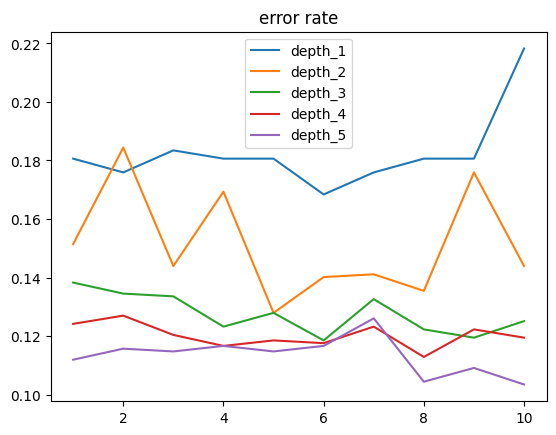

,depth_1,depth_2,depth_3,depth_4,depth_5
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.182502,0.151364,0.127563,0.120226,0.113358
std,0.013260,0.018733,0.006873,0.004108,0.006581
min,0.168391,0.127940,0.118532,0.112888,0.103481
25%,0.177093,0.140405,0.122531,0.117827,0.109831
50%,0.180621,0.143932,0.126529,0.119944,0.114770
75%,0.180621,0.164864,0.133349,0.123001,0.116416
max,0.218250,0.184384,0.138288,0.126999,0.126058


In [80]:
# 2
df.plot()
plt.title("error rate")
plt.show()

df.describe()

# from the graph we get depth = 5, N = 10

In [81]:
# 3 accate is 
pred_best = clf_mat[5][10].predict(X_test)
accuracy_score(y_test, pred_best)

0.896519285042333

In [136]:
# 4 confusion is
confusion_matrix(y_test, pred_best)

array([[167,  65],
       [ 45, 786]], dtype=int64)

In [137]:
tn,fp,fn,tp=confusion_matrix(y_test, pred_best).ravel()
tn,fp,fn,tp
tnr=tn/(tn+fp)
tpr=tp/(tp+fn)
tnr,tpr

(0.7198275862068966, 0.9458483754512635)

In [86]:
# Q6 SVM line
import sklearn.svm as svm

lin_svm = svm.SVC(C=1.0, kernel='linear')
lin_svm.fit(X_train, y_train)

lin_pred = lin_svm.predict(X_test)
accuracy_score(y_test, lin_pred), confusion_matrix(y_test, lin_pred)

(0.863593603010348,
 array([[131, 101],
        [ 44, 787]], dtype=int64))

In [89]:
# poly
poly_svm = svm.SVC(kernel='poly', degree=2)
poly_svm.fit(X_train, y_train)

poly_pred = poly_svm.predict(X_test)
accuracy_score(y_test, poly_pred), confusion_matrix(y_test, poly_pred)

(0.8617121354656632,
 array([[126, 106],
        [ 41, 790]], dtype=int64))

In [138]:
# gaussian
rbf_svm = svm.SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)

rbf_pred = rbf_svm.predict(X_test)
accuracy_score(y_test, rbf_pred), confusion_matrix(y_test, rbf_pred)

(0.8673565380997178,
 array([[125, 107],
        [ 34, 797]], dtype=int64))

In [140]:
# gaussian is the best, we only calculate gaussian's TNR TPR
tn,fp,fn,tp=confusion_matrix(y_test, rbf_pred).ravel()
tn,fp,fn,tp
tnr=tn/(tn+fp)
tpr=tp/(tp+fn)
tnr,tpr

(0.5387931034482759, 0.9590854392298436)

In [142]:
# Q8  we can use corr
df.corr()['label'].sort_values()
# from the corr

NSP     -0.928746
ALTV    -0.489400
LB      -0.251875
Min     -0.158171
Mean     0.059107
label    1.000000
Name: label, dtype: float64